# ***CLUSTERING COUNTRIES FOR STRATEGIC AID ALLOCATION***

## ***BUSINESS PROBLEM STATEMENT***

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


### **Importing python libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '/content/drive/MyDrive/ML business case and data/Country clustering for strategic aid allocation/Country-data.csv'
df = pd.read_csv(file_path)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


From the above we can see that we dont have any missing values in any of the columns. And we can observe the following statistics :

1. The mean child mortality is 38.27 per 1000 children
2. The max child mortality is 208 per 1000 children
3. The mean income per person per country is $ 17144.
4. The average GDP of all the countries together is 12964. With some countries having a min GDP of 231 and some having a max of 105000.
5. The average inflation of the countries is 7.7 %.
6. The average life expectancy across the globe is 70.55 years with some countries having a max of 82 and some countries having a min of 32.
7. The global average of export GDP is 41 % of GDP, whereas that of import is 46 % of GDP. There are some exceptional countries that has  max export of 200 % of GDP and very few countries with very low imports of 0.065 % of GDP.
8. Around 50 percent of the countries population spends around 6.32 % per capita of a country.

**Checking for missing values**

In [5]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


There is no mising values across all the columns.

## **Exploratory Data analysis**

### Outlier detection in numerical columns

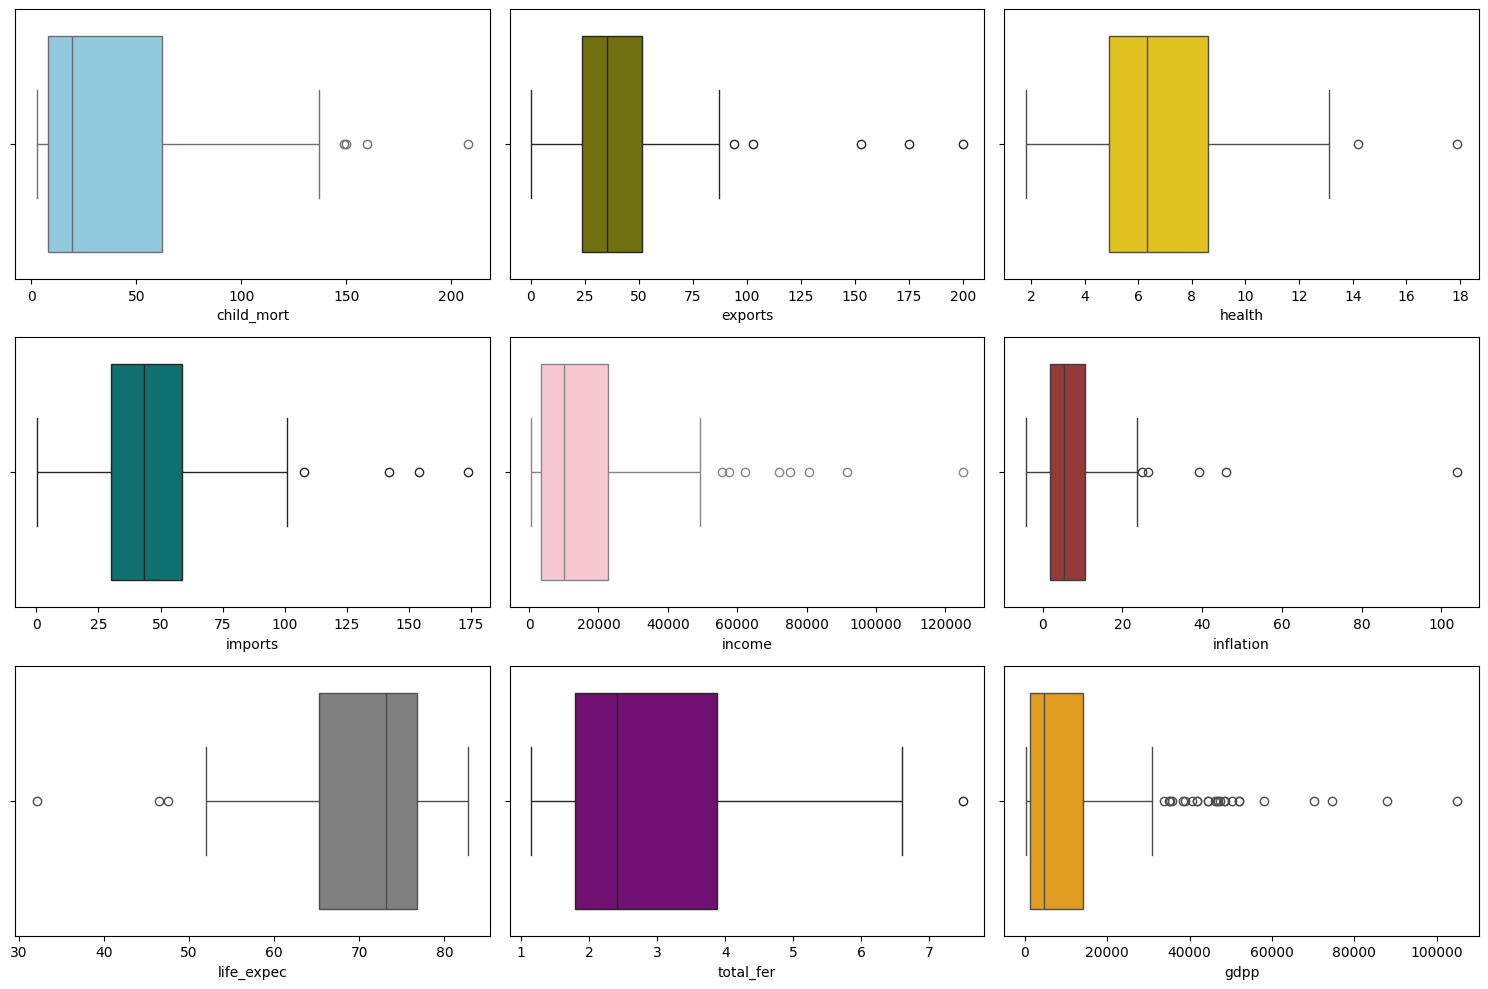

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
sns.boxplot(x=df['child_mort'], ax=axes[0, 0], color = 'skyblue')
sns.boxplot(x=df['exports'], ax=axes[0, 1], color = 'olive')
sns.boxplot(x=df['health'], ax=axes[0, 2], color = 'gold')
sns.boxplot(x=df['imports'], ax=axes[1, 0], color = 'teal')
sns.boxplot(x=df['income'], ax=axes[1, 1], color = 'pink')
sns.boxplot(x=df['inflation'], ax=axes[1, 2], color = 'brown')
sns.boxplot(x=df['life_expec'], ax=axes[2, 0], color = 'gray')
sns.boxplot(x=df['total_fer'], ax=axes[2, 1],color='purple')
sns.boxplot(x=df['gdpp'], ax=axes[2, 2],color='orange')
plt.tight_layout()
plt.show()


from the above boxplots we can see that almost all the numerical columns has outliers which needs to be treated so that we get proper statistical properties and the model which we create from this data also will be more generalized.

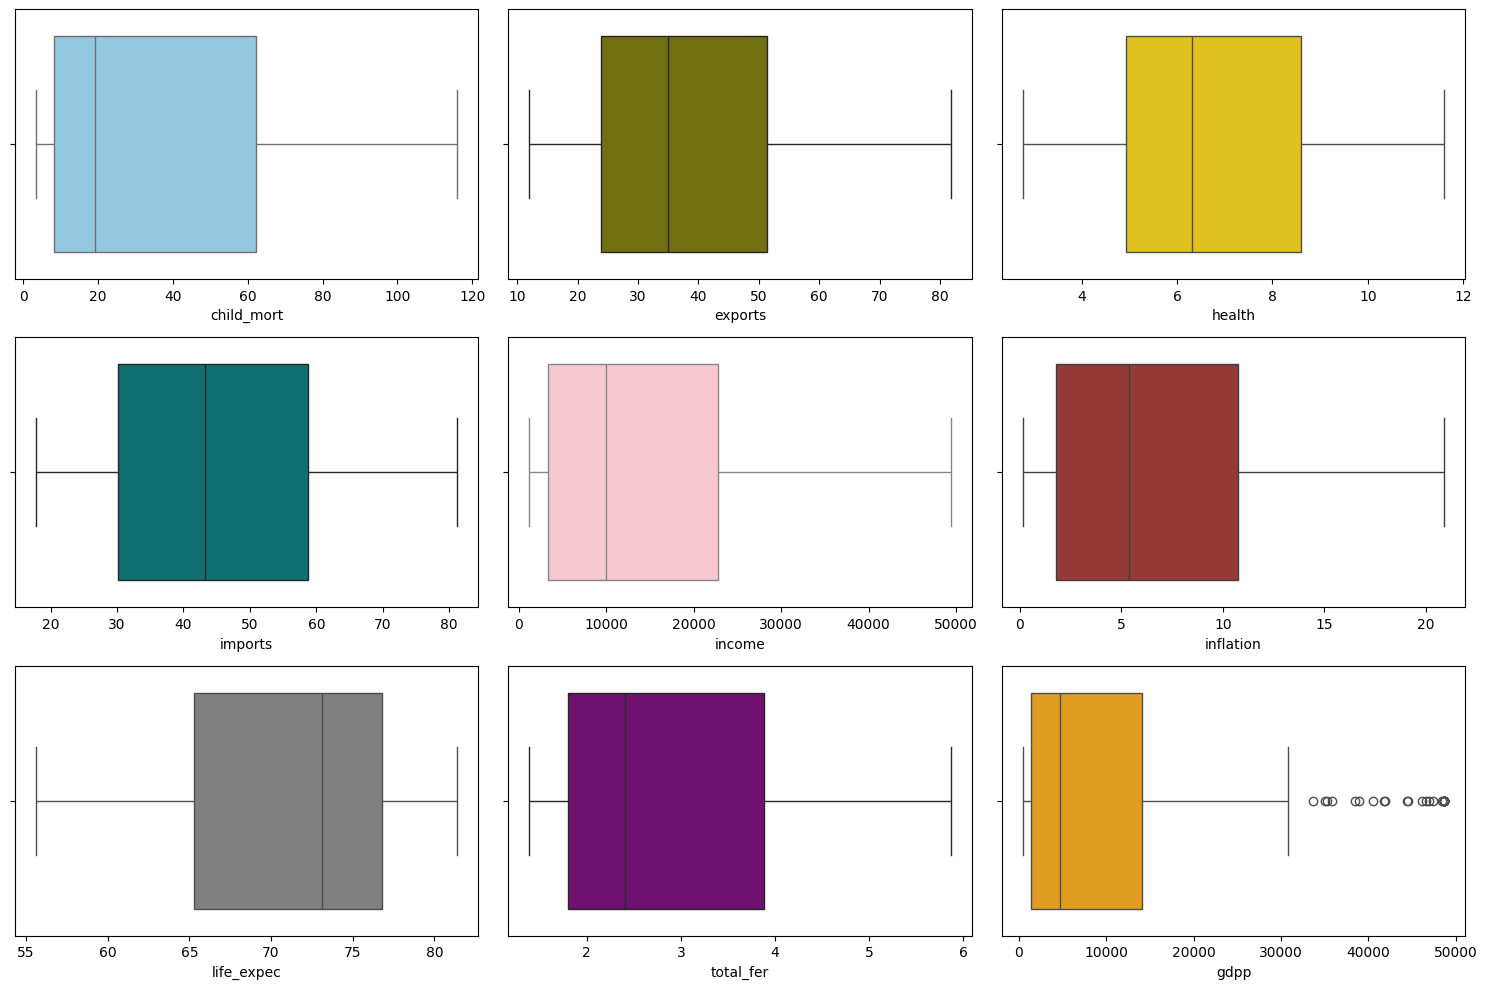

In [7]:
from scipy.stats.mstats import winsorize

# Apply winsorization to each numerical column
df['child_mort'] = winsorize(df['child_mort'], limits=[0.05, 0.05])
df['exports'] = winsorize(df['exports'], limits=[0.05, 0.05])
df['health'] = winsorize(df['health'], limits=[0.05, 0.05])
df['imports'] = winsorize(df['imports'], limits=[0.05, 0.05])
df['income'] = winsorize(df['income'], limits=[0.05, 0.05])
df['inflation'] = winsorize(df['inflation'], limits=[0.05, 0.05])
df['life_expec'] = winsorize(df['life_expec'], limits=[0.05, 0.05])
df['total_fer'] = winsorize(df['total_fer'], limits=[0.05, 0.05])
df['gdpp'] = winsorize(df['gdpp'], limits=[0.05, 0.05])

# Visualize the distributions after winsorization
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
sns.boxplot(x=df['child_mort'], ax=axes[0, 0], color='skyblue')
sns.boxplot(x=df['exports'], ax=axes[0, 1], color='olive')
sns.boxplot(x=df['health'], ax=axes[0, 2], color='gold')
sns.boxplot(x=df['imports'], ax=axes[1, 0], color='teal')
sns.boxplot(x=df['income'], ax=axes[1, 1], color='pink')
sns.boxplot(x=df['inflation'], ax=axes[1, 2], color='brown')
sns.boxplot(x=df['life_expec'], ax=axes[2, 0], color='gray')
sns.boxplot(x=df['total_fer'], ax=axes[2, 1], color='purple')
sns.boxplot(x=df['gdpp'], ax=axes[2, 2], color='orange')
plt.tight_layout()
plt.show()


From the above box plots we can see that we have treated the outliers on all columns except gdpp where the winzorization with 0.05 percentile has not treated the outliers in gdpp very much. So I will perform winzorization with increased limits to cap the outliers.

<Axes: xlabel='gdpp'>

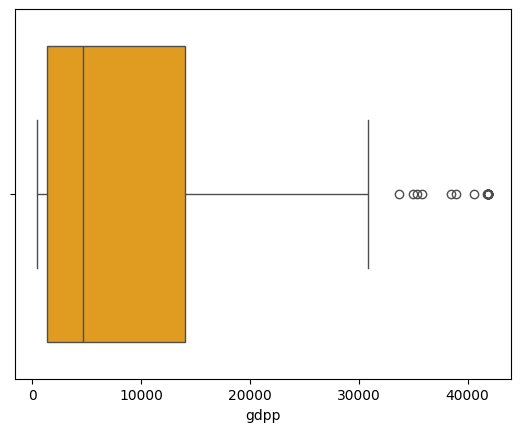

In [8]:
df['gdpp'] = winsorize(df['gdpp'], limits=[0.05, 0.1])
sns.boxplot(x=df['gdpp'],  color='orange')

Looks like we have to still increase the limits but the above shows it has further reduced the ouliers from the later.

<Axes: xlabel='gdpp'>

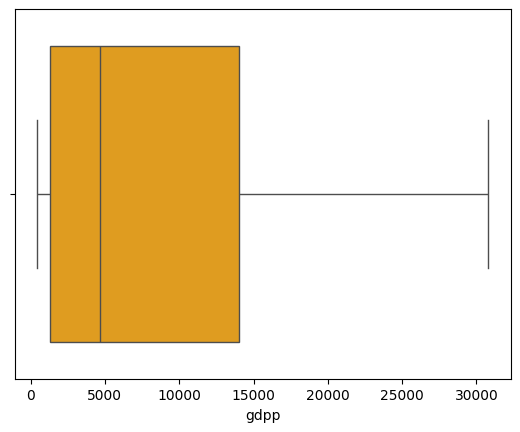

In [9]:
df['gdpp'] = winsorize(df['gdpp'], limits=[0.05, 0.15])
sns.boxplot(x=df['gdpp'],  color='orange')

Now we could see that all the outliers are treated in gdpp and there are no outliers in any of the columns.

### **Univariate Analysis**

**Histogram plot for Numerical columns**

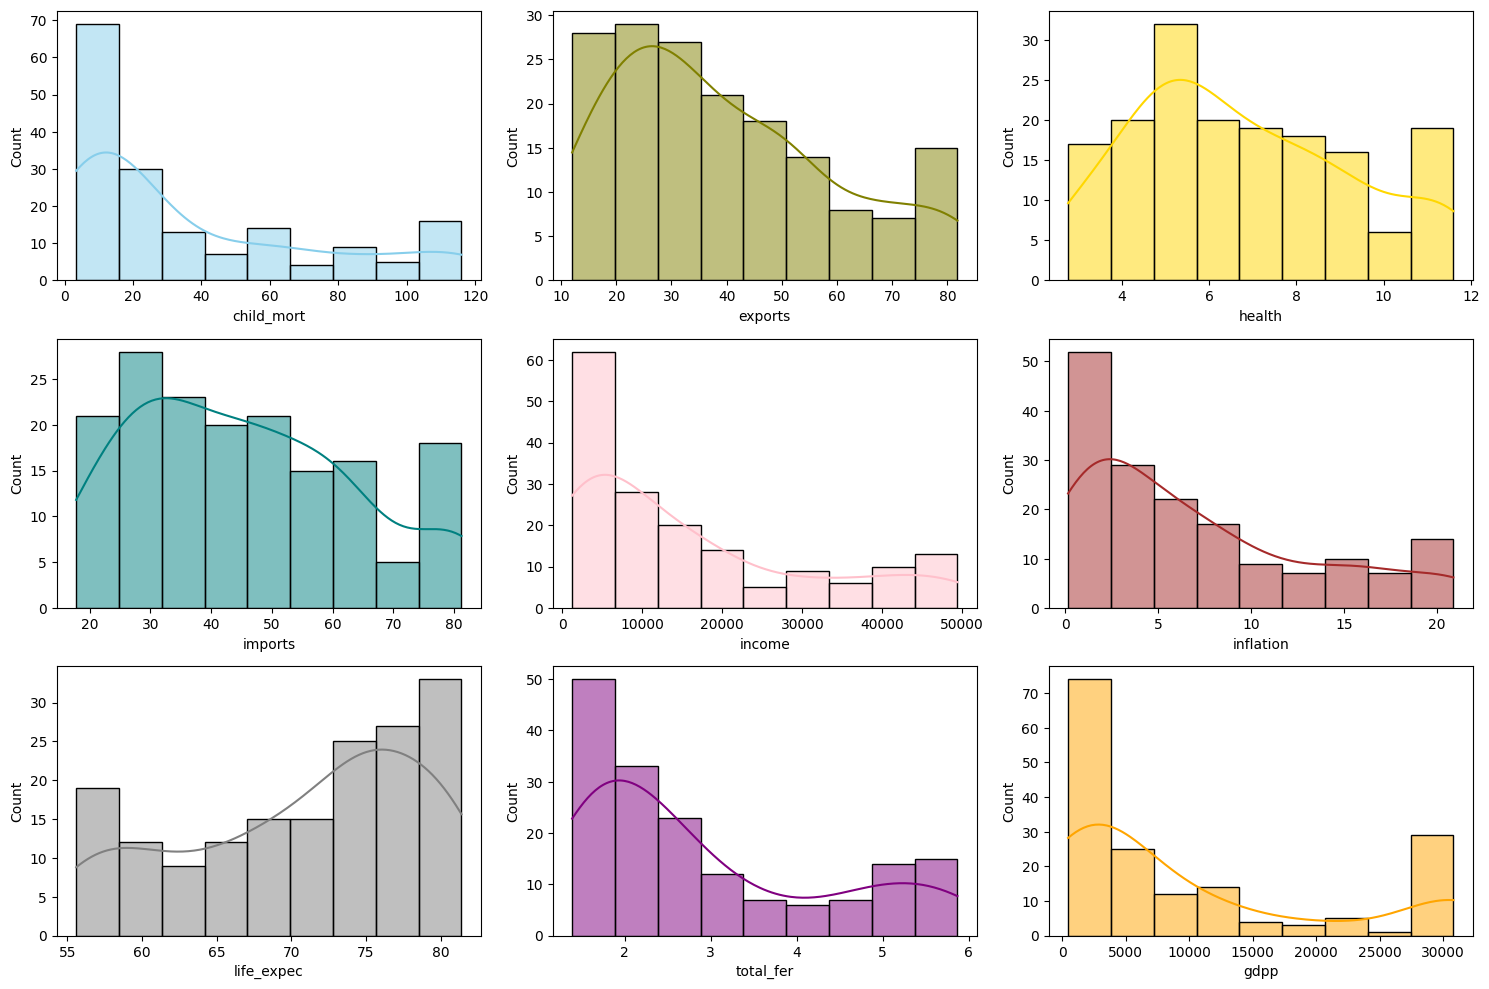

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
sns.histplot(df['child_mort'], kde=True, ax=axes[0, 0], color='skyblue')
sns.histplot(df['exports'], kde=True, ax=axes[0, 1], color='olive')
sns.histplot(df['health'], kde=True, ax=axes[0, 2], color='gold')
sns.histplot(df['imports'], kde=True, ax=axes[1, 0], color='teal')
sns.histplot(df['income'], kde=True, ax=axes[1, 1], color='pink')
sns.histplot(df['inflation'], kde=True, ax=axes[1, 2], color='brown')
sns.histplot(df['life_expec'], kde=True, ax=axes[2, 0], color='gray')
sns.histplot(df['total_fer'], kde=True, ax=axes[2, 1], color='purple')
sns.histplot(df['gdpp'], kde=True, ax=axes[2, 2], color='orange')
plt.tight_layout()
plt.show()


From the above plots we can observe the following:
1. **Child_mort** : From the histogram with kde we can see that the distribution is having a left skew with majority of the countries having less mortality. There are very few countries with higher child mortality rate.
2. **Exports** : From the above histogram for exports we can observe that the distribution is left skewed indicating that most of the countries have a very low exports and very few countries are having high exports which might be from well developed countries.
3. **Health** : The health histogram shows us that it is slightly left skewed although most of the countries have 4 to 8 percent of the GDP in health expenditure. There are few countries which has high health expenditure suggesting the existence of developing or under developed countries.
4. **Imports** : From the Imports histogram we can see that its a left skewed histogram indicating that there are many countries which are importing the goods which might be a cause of less developed countries which has more dependencies with other countries to meet their growing demands.
5. **Income** : The income histogram shows us that most of the countries has a per capita income very low due to under developed economy. Few countries on the other hand have a very good per capita income.
6. **Inflation** : From the inflation histogram we can see that most countries have a very low inflation rate siting to be having a well developed economy and having left skewness to the data. Whereas some countries have very high inflation rate which could be the cause of under developed countries where the government has to increase the rates of goods and service to cope up with the countries economy requirements.
7. **Life_expec** : The life expectancy histogram has a positive skew indicating most countries have a good life expectancy which could be due to good health infrastructure and good availability of food and healthy habbits.
Some countries have very less life expectancy due to the poor medical infrastructure.
8. **Total_fer** : The Total fertility looks to be left skewed as the possible reason could be most women prefer to give birth to 1 to 3 children only as there might be poor economical situtaions making the livelihood difficult.
9. **Gdpp** : The GDP histogram is left skewed indicating that most countries has a very less GDP whereas on the other hand there are some countries we could see which has high GDP possibily from developed countries.

**Top 20 countries with Highest Child mortality rates**


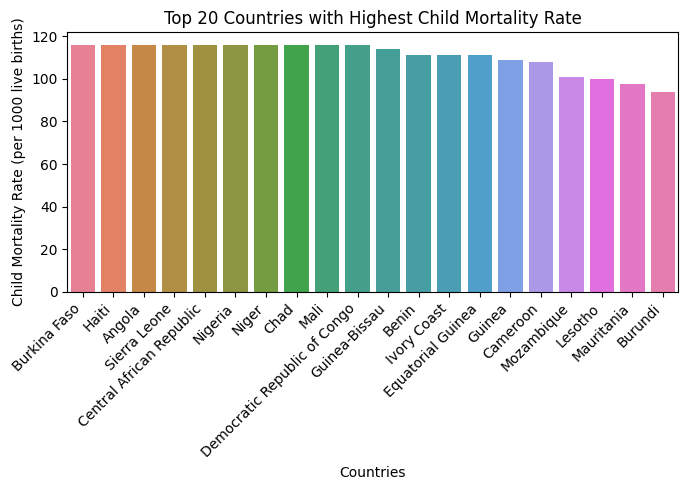

In [11]:
top_20_child_mort = df.sort_values('child_mort', ascending=False).head(20)

plt.figure(figsize=(7, 5))
sns.barplot(x='country', y='child_mort', data=top_20_child_mort, palette = "husl")
plt.title('Top 20 Countries with Highest Child Mortality Rate')
plt.xlabel('Countries')
plt.ylabel('Child Mortality Rate (per 1000 live births)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


From the above charts we can see the top 20 countries where the Child mortality rates are very high. This could be due countries poor medical infrastructure which lacks support or availablity to most of the populations. We could see majority of the countries are from african continent which is known to have a very low GDP and poor economy.

**Top 20 Countries with Highest GDP**

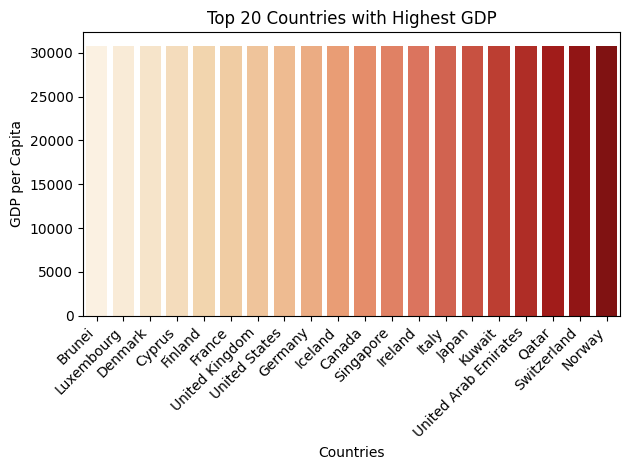

In [12]:
top_20_gdp = df.sort_values('gdpp', ascending=False).head(20)

sns.barplot(x='country', y='gdpp', data=top_20_gdp, palette="OrRd")
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Countries')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above shown countries has the highest GDP. All the countries has same GDP, this could be the reason of us treating the extreme outliers causing it to have the same value across different countries. We can see all the top countries with exceptional GDP here which are well developed economies. So these countries would not be needing of financial aids.

**Top 20 Countries with Lowest GDP**

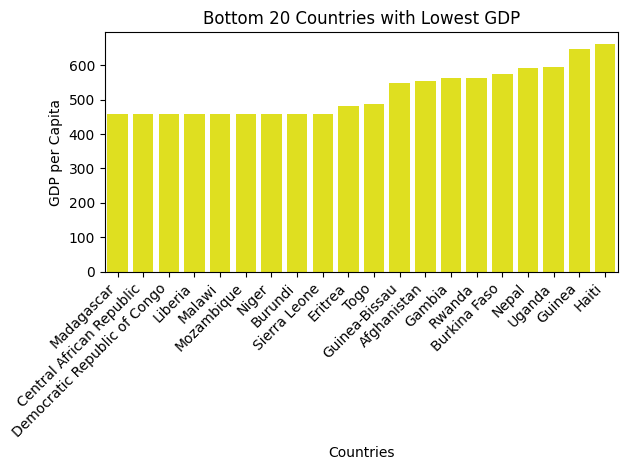

In [13]:
bottom_20_gdp = df.sort_values('gdpp', ascending=True).head(20)

sns.barplot(x='country', y='gdpp', data= bottom_20_gdp, color = "Yellow")
plt.title('Bottom 20 Countries with Lowest GDP')
plt.xlabel('Countries')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Above shows the list of countries which has the lowest GDP in the world. We can most of the countries here are from African continent indicating they need more financial aid to support their countries economy and health infrastructure.

**Top 20 Countries with the lowest Life expectancy**

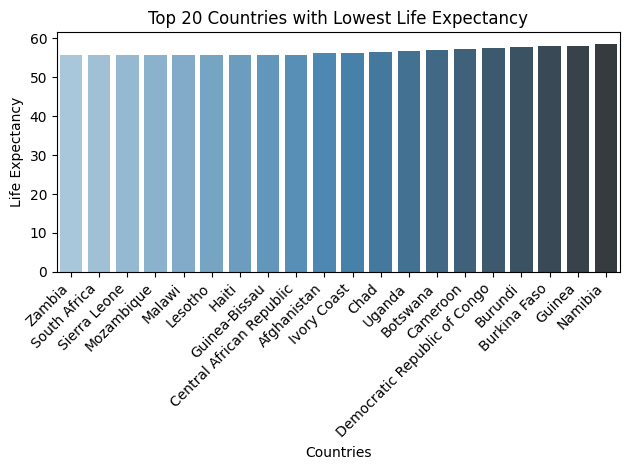

In [14]:
top_20_life_exp = df.sort_values('life_expec', ascending=True).head(20)

sns.barplot(x='country', y='life_expec', data=top_20_life_exp, palette="Blues_d")
plt.title('Top 20 Countries with Lowest Life Expectancy')
plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above chart we can see the top 20 countries with the lowest life expectancy, this could potentially be the reason due to poor medical infrastructure as we could see the most of the countries in this list had higher child mortality rates. Hence we can arrive at a conclusion that these countries has to start spending more on their health system so that both child mortality rate and life expectancy issues are fixed.

**Top 20 countries with the highest Export**

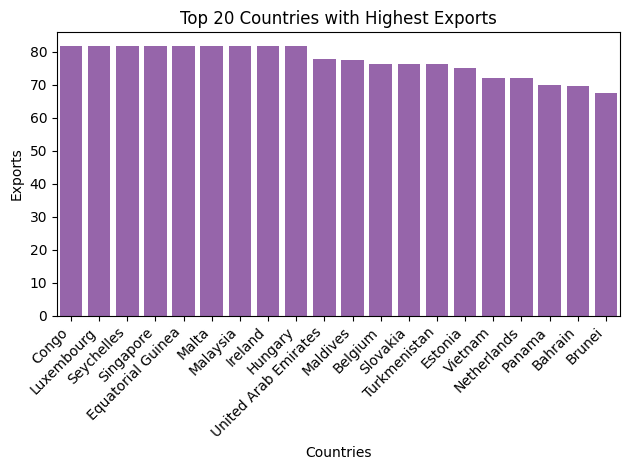

In [15]:
top_20_exports = df.sort_values('exports', ascending=False).head(20)

sns.barplot(x='country', y='exports', data=top_20_exports, color="#9B59B6")
plt.title('Top 20 Countries with Highest Exports')
plt.xlabel('Countries')
plt.ylabel('Exports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above list of countries have very high exporting which suggests they are potentially having a very good economy due to which they can satisfy their needs and export it to other countries. These countries are either developing or developed countries.

**Top 20 countries with the highest Import**

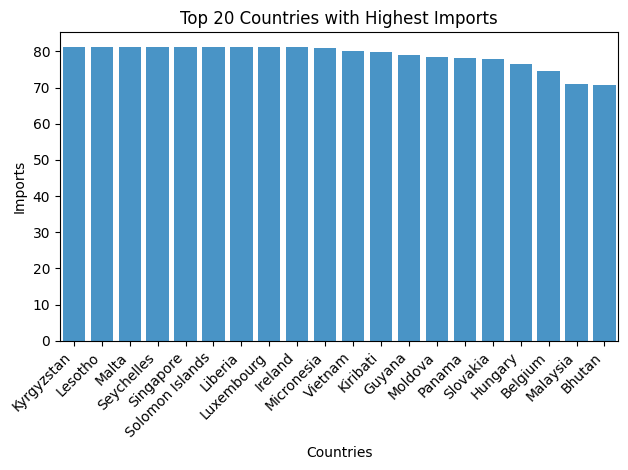

In [16]:
top_20_imports = df.sort_values('imports', ascending=False).head(20)

sns.barplot(x='country', y='imports', data=top_20_imports, color="#3498DB")
plt.title('Top 20 Countries with Highest Imports')
plt.xlabel('Countries')
plt.ylabel('Imports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The high import rate in these countries could be due to the fact that they are more dependent on products from other countries as there could be constraints in the production of these goods in these countries and as a reason to meet their demands they have to import them.

**Top 20 Countries with highest Income per person**

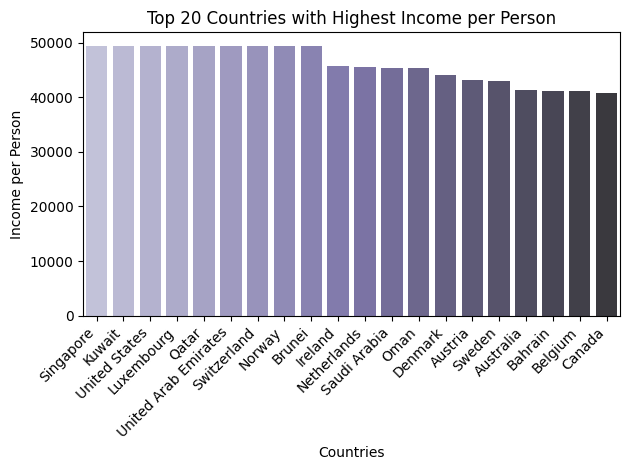

In [17]:
top_20_income = df.sort_values('income', ascending=False).head(20)

sns.barplot(x='country', y='income', data=top_20_income, palette="Purples_d")

plt.title('Top 20 Countries with Highest Income per Person')
plt.xlabel('Countries')
plt.ylabel('Income per Person')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above shown countries have high income per person indicating that these are well developed countries.

**Top 20 Countries with highest Inflation rates**

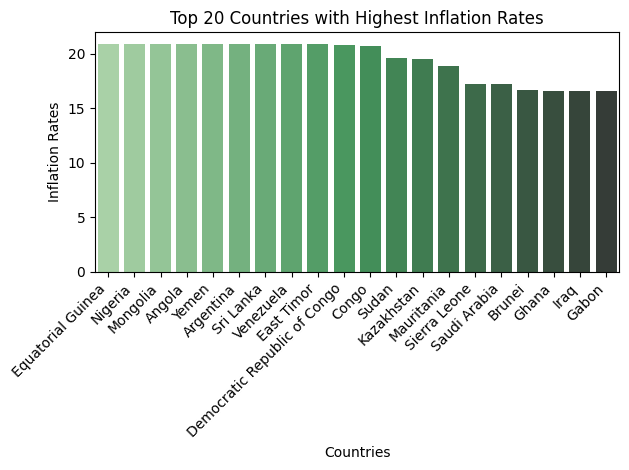

In [18]:
top_20_inflation = df.sort_values('inflation', ascending=False).head(20)

sns.barplot(x='country', y='inflation', data=top_20_inflation, palette="Greens_d")

plt.title('Top 20 Countries with Highest Inflation Rates')
plt.xlabel('Countries')
plt.ylabel('Inflation Rates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In the above chart we could see the top 20 countries that has the highest inflation rates the potential reasons could be higher demand of products but the production is low, could be due to governmental policies to contribute to countries growth to boost the economy or could be due to some disturbances in the production siting to conflicts with other countries or due to disasters like natural calamities.

**Top 10 highest health spending countries**

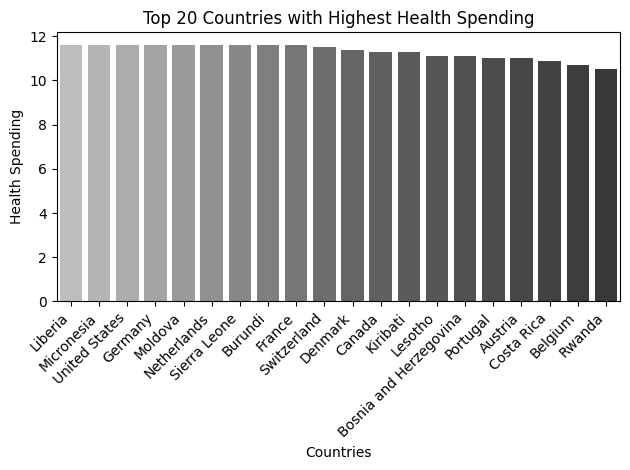

In [19]:
top_20_health = df.sort_values('health', ascending=False).head(20)

sns.barplot(x='country', y='health', data=top_20_health, palette="Greys_d")

plt.title('Top 20 Countries with Highest Health Spending')
plt.xlabel('Countries')
plt.ylabel('Health Spending')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above chart we can see the top 20 countries spending on health. This countries could probably have the best in class medical facilities with world class treatments.

### **Bivariate Analysis**

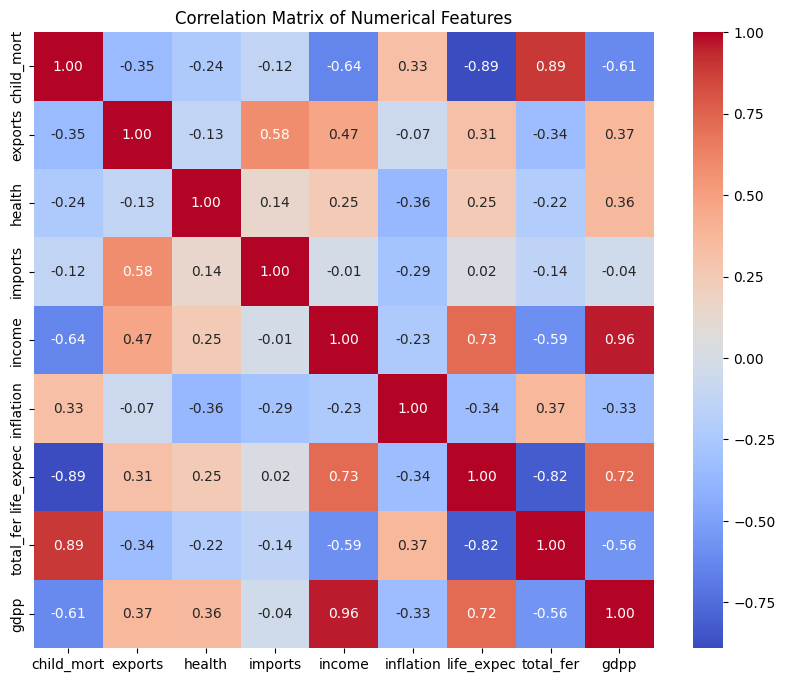

In [20]:
correlation_matrix = df.drop('country', axis = 1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Scatter plot for Child Mortality Vs Health spends**

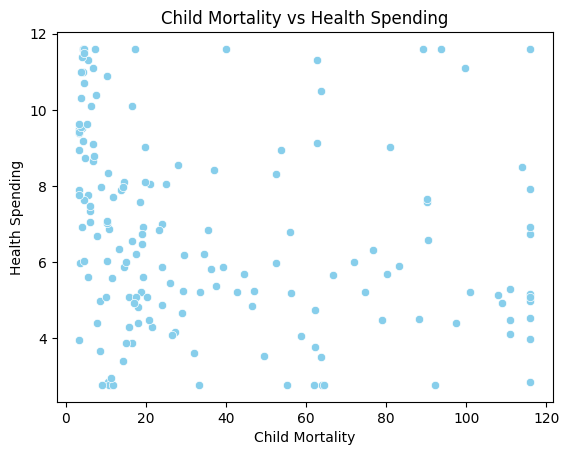

In [21]:
sns.scatterplot(x='child_mort', y='health', data=df, color='skyblue')
plt.title('Child Mortality vs Health Spending')
plt.xlabel('Child Mortality')
plt.ylabel('Health Spending')
plt.show()

**Scatter plot for Income vs Inflation rate**

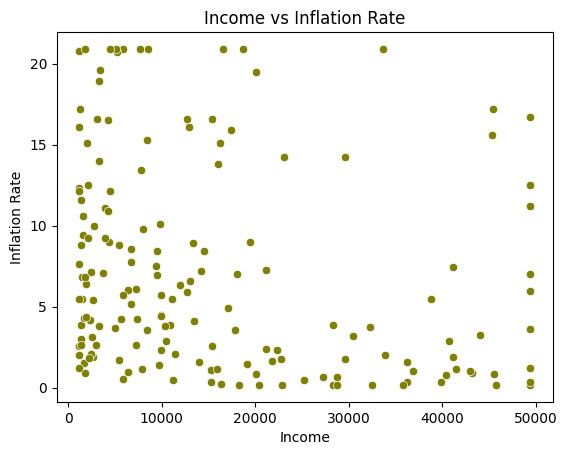

In [22]:
sns.scatterplot(x='income', y='inflation', data=df, color='olive')
plt.title('Income vs Inflation Rate')
plt.xlabel('Income')
plt.ylabel('Inflation Rate')
plt.show()

**Scatter plot for Exports vs Imports**

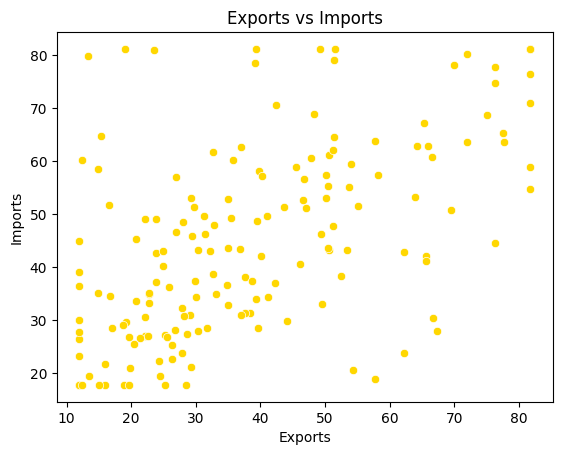

In [23]:
sns.scatterplot(x='exports', y='imports', data=df, color='gold')
plt.title('Exports vs Imports')
plt.xlabel('Exports')
plt.ylabel('Imports')
plt.show()

**Scatter plot for Income vs health**

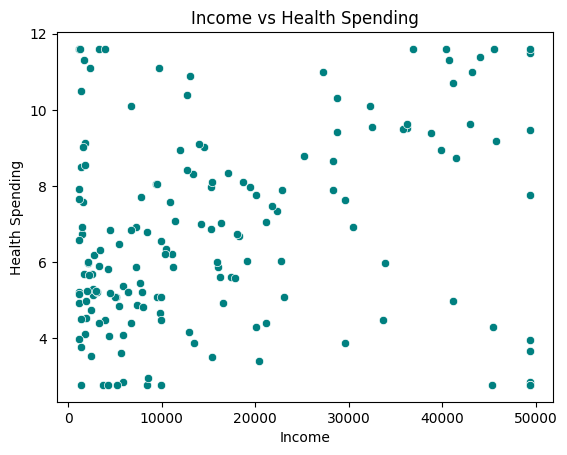

In [24]:
sns.scatterplot(x='income', y='health', data=df, color='teal')
plt.title('Income vs Health Spending')
plt.xlabel('Income')
plt.ylabel('Health Spending')
plt.show()

**Scatter plot for Health Vs GDP**

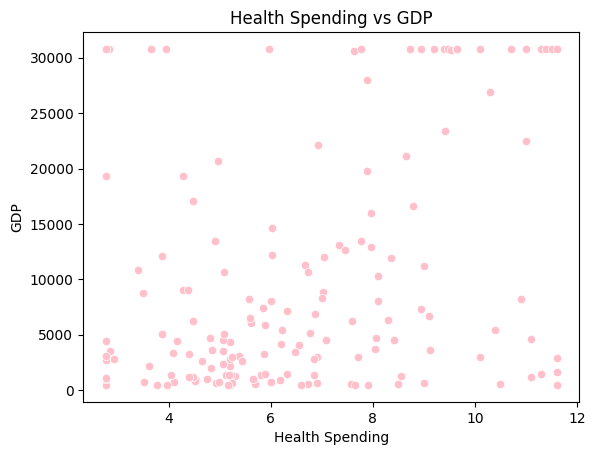

In [25]:
sns.scatterplot(x='health', y='gdpp', data=df, color='pink')
plt.title('Health Spending vs GDP')
plt.xlabel('Health Spending')
plt.ylabel('GDP')
plt.show()

**Scatter plot for Income Vs Total Fertility**

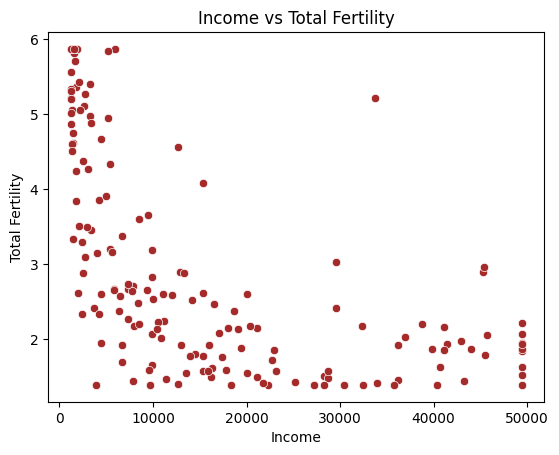

In [26]:
sns.scatterplot(x='income', y='total_fer', data=df, color='brown')
plt.title('Income vs Total Fertility')
plt.xlabel('Income')
plt.ylabel('Total Fertility')
plt.show()

From the above Heatmap and Scatter plots we can derive the following conclusions :
1. We could see that the income and total fertility is slightly negatively correlated, this could suggest that as the people with more income opt to have less kids compare to the people who earn less.
2. Health and GDP seems to be weakly positively correlated with each other as it is evident from the scatter plot that few countries where the GDP is high the cost of health is very less and we could see some countries which has very less GDP spend more on health.
3. We could see Income and health spending is weakly positive correlated.
4. Export and Imports are moderately correlated to each other as this could be due to most countries be developing as they need both import and exports.
5. Income and inflation is slightly negatively correlated which could be due to the fact that countries where the per capita income is more has more spending among the people and due to which the economy of the country is good due to which it is having negative inflation effect.
6. In the countries where the GDP is more we could see it is strongly positive correlated with life expectancy which could be due to the fact that the medical infrastructure is good, availability of good food and hence the citizen live a longer life.
7. Child mortality is slightly negative correlated as it could be due to countries which spend more on health has a lower child mortality rate.
8. Income and life expectancy are strongly positive correlated as more earning leads to a healthy lifestyle and hence more life expectancy.
9. GDP and Income is very strongly correlated which suggests that people earn more in countries that are well developed and have a very good GDP.
10. Child mortality and Total fertility is strongly positive correlated suggesting parents tend to give birth more where the child mortality is more as they might want to have offspring to continue their family and increase the chances of their offsprings survivability.

## **Hypothesis Testing**

**Health Vs Life Expectancy**

**T-Test Independent**

**H0 : *Countries with High health expenditure and low health expenditure have same life expectancy***

**Ha : *Countries with high health expenditure and low health expenditure have significant difference in life expectancy***

For this hypothesis lets conduct a two sample t-test to find out if the two groups of people , one with high and other with low health expenditure have significant difference in life expectancy.

In [27]:
from scipy import stats

correlation = df['health'].corr(df['life_expec'])
print("Correlation between health and Life Expectancy:", correlation)

threshold = df['health'].median()

high_spending = df[df['health'] > threshold]['life_expec']
low_spending = df[df['health'] <= threshold]['life_expec']

t_statistic, p_value = stats.ttest_ind(high_spending, low_spending)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in life expectancy between countries with high and low health spending.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in life expectancy between countries with high and low health spending.")


Correlation between health and Life Expectancy: 0.24947600342499923
T-statistic: 3.4844241487264735
P-value: 0.0006317379160618184
Reject the null hypothesis. There is a significant difference in life expectancy between countries with high and low health spending.


**Income Vs Total fertility**

**T-test Independent**

**H0: *There is no significant difference in income per person between countries with high and low total fertility rates.***

**Ha: *There is a significant difference in income per person between countries with high and low total fertility rates.***

In [28]:
correlation = df['total_fer'].corr(df['income'])
print("Correlation between Total Fertility and Income per Person:", correlation)

fertility_threshold = df['total_fer'].median()

high_fertility = df[df['total_fer'] > fertility_threshold]['income']
low_fertility = df[df['total_fer'] <= fertility_threshold]['income']

t_statistic, p_value = stats.ttest_ind(high_fertility, low_fertility)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in income per person between countries with high and low total fertility rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in income per person between countries with high and low total fertility rates.")


Correlation between Total Fertility and Income per Person: -0.5883441432027091
T-statistic: -9.605270978201025
P-value: 1.2509090988118386e-17
Reject the null hypothesis. There is a significant difference in income per person between countries with high and low total fertility rates.


**Child Mortality Vs Income**

**Pearson R correlation test**

**H0 : *There is no significant correlation between child mortality and income per person.***

**Ha : *There is significant correlation between child mortality and income per person.***

In [29]:
from scipy.stats import pearsonr

pearson_corr, pearson_p_value = pearsonr(df['child_mort'], df['income'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-value:", pearson_p_value)

alpha = 0.05
if pearson_p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between child mortality and income per person.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between child mortality and income per person.")

Pearson Correlation Coefficient: -0.6353145168605605
P-value: 2.925297942217806e-20
Reject the null hypothesis. There is a significant correlation between child mortality and income per person.


**T-test Independent**

**H0 : *There is no significant difference in Child mortality rates between countries with high income and low income per person***

**Ha : *There is significant difference in Child mortality rates between countries with high income and low income per person***

In [30]:
income_threshold = df['income'].median()
high_income = df[df['income'] > income_threshold]['child_mort']
low_income = df[df['income'] <= income_threshold]['child_mort']

t_statistic, p_value = stats.ttest_ind(high_income, low_income)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in child mortality between countries with high and low income per person.")
else :
    print("Fail to reject the null hypothesis. There is no significant difference in child mortality between countries with high and low income per person.")

T-statistic: -11.010254104111072
P-value: 1.7361617535994843e-21
Reject the null hypothesis. There is a significant difference in child mortality between countries with high and low income per person.


**Inflation Vs Economic Stability (GDP)**

**Peasron R correalion Test**

**H0 : *There is no significant correlation between Inflation and GDP.***

**H0 : *There is significant correlation between Inflation and GDP.***

In [31]:
pearson_corr, pearson_p_value = pearsonr(df['inflation'], df['gdpp'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-value:", pearson_p_value)

alpha = 0.05
if pearson_p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between inflation and GDP.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between inflation and GDP.")

Pearson Correlation Coefficient: -0.33101325168678647
P-value: 1.246337315683582e-05
Reject the null hypothesis. There is a significant correlation between inflation and GDP.


**T-test Independent**

**H0 : *There is no significant difference between in GDP between countries with high inflation and low inflation rates.***

**Ha : *There is significant difference between in GDP between countries with high inflation and low inflation rates.***

In [32]:
inflation_threshold = df['inflation'].median()

high_inflation = df[df['inflation'] > inflation_threshold]['gdpp']
low_inflation = df[df['inflation'] <= inflation_threshold]['gdpp']

t_statistic, p_value = stats.ttest_ind(high_inflation, low_inflation)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in GDP between countries with high and low inflation rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in GDP between countries with high and low inflation rates.")

T-statistic: -4.469435408349418
P-value: 1.4519293683001491e-05
Reject the null hypothesis. There is a significant difference in GDP between countries with high and low inflation rates.


**Income Vs Life Expectancy**

**Pearson R correlation Test**

**H0 : *There is no significant correlation between Income and Life Expectancy.***

**Ha : *There is significant correlation between Income and Life Expectancy.***

In [33]:
pearson_corr, pearson_p_value = pearsonr(df['income'], df['life_expec'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-value:", pearson_p_value)

alpha = 0.05
if pearson_p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between income and life expectancy.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between income and life expectancy.")

Pearson Correlation Coefficient: 0.7264340385697573
P-value: 1.126005284841642e-28
Reject the null hypothesis. There is a significant correlation between income and life expectancy.


**T-test Independent**

**H0 : *There is no significant difference in the life expectancy between countries with high income per person and low income per person.***

**Ha : *There is significant difference in the life expectancy between countries with high income per person and low income per person.***

In [34]:
income_threshold = df['income'].median()

high_income = df[df['income'] > income_threshold]['life_expec']
low_income = df[df['income'] <= income_threshold]['life_expec']

t_statistic, p_value = stats.ttest_ind(high_income, low_income)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in life expectancy between countries with high and low income per person.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in life expectancy between countries with high and low income per person")

T-statistic: 11.705722179246914
P-value: 1.9957138911746426e-23
Reject the null hypothesis. There is a significant difference in life expectancy between countries with high and low income per person.


**Income Vs GDP**

**Pearson R correlation Test**

**H0 : *There is no significant correlation between Income and GDP.***

**Ha : *There is significant correlation between Income and GDP.***

In [35]:
pearson_corr, pearson_p_value = pearsonr(df['income'], df['gdpp'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-value:", pearson_p_value)

alpha = 0.05
if pearson_p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between income and GDP.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between income and GDP.")

Pearson Correlation Coefficient: 0.9560219135832994
P-value: 8.263355830856135e-90
Reject the null hypothesis. There is a significant correlation between income and GDP.


**T-Test Independent**

**H0 : *There is no significant difference in Income between countries with high inflation rate and low inflation rate.***

**Ha : *There is significant difference in Income between countries with high inflation rate and low inflation rate.***

In [36]:
gdp_threshold = df['gdpp'].median()

high_gdp = df[df['gdpp'] > gdp_threshold]['income']
low_gdp = df[df['gdpp'] <= gdp_threshold]['income']

t_statistic, p_value = stats.ttest_ind(high_gdp, low_gdp)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in income between countries with high and low GDP.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in income between countries with high and low GDP")

T-statistic: 15.354849012541145
P-value: 1.2864362303913711e-33
Reject the null hypothesis. There is a significant difference in income between countries with high and low GDP.


## **ML Modelling**

Feature Engineering

In [163]:
child_mort_threshold = df['child_mort'].median()
inflation_threshold = df['inflation'].median()
total_fer_threshold = df['total_fer'].median()

def feature_engineer(df):
  df['High_Child_Mortality'] = (df['child_mort'] > child_mort_threshold).astype(int)

  df['High_Inflation'] = (df['inflation'] > inflation_threshold).astype(int)

  df['High_Total_Fertility'] = (df['total_fer'] > total_fer_threshold).astype(int)

  df['Export_Import_Ratio'] = df['exports'] / df['imports']

  df['Health_GDP_Ratio'] = df['health'] / df['gdpp']
  return df

In [164]:
feature_engineer(df).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,High_Child_Mortality,High_Inflation,High_Total_Fertility,Export_Import_Ratio,Health_GDP_Ratio
0,Afghanistan,90.2,12.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1,0.267261,0.013707
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,0.576132,0.001601
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1,1,1.222930,0.000935
3,Angola,116.0,62.3,2.85,42.9,5900,20.90,60.1,5.87,3530,1,1,1,1.452214,0.000807
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,0.772496,0.000494


In [165]:
import pickle

In [166]:
with open('feature_engineer.pkl', 'wb') as file:
    pickle.dump(feature_engineer, file)

In [171]:
thresholds = {'child_mort_threshold' : df['child_mort'].median(),
  'inflation_threshold' : df['inflation'].median(),
  'total_fer_threshold' : df['total_fer'].median()
  }

In [172]:
with open('threshold.pkl', 'wb') as file:
    pickle.dump(thresholds, file)

**Train test split**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [100]:
X = df.drop('country', axis = 1)

Standardizing the data

In [101]:
scale_columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'Export_Import_Ratio', 'Health_GDP_Ratio']
non_scale_columns = ['High_Child_Mortality', 'High_Inflation', 'High_Total_Fertility']

X_scale = X[scale_columns]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_scale), columns=X_scale.columns, index = X.index)

X_scaled[non_scale_columns] = X[non_scale_columns]

In [173]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [102]:
X_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Export_Import_Ratio,Health_GDP_Ratio,High_Child_Mortality,High_Inflation,High_Total_Fertility
0,1.479555,-1.370268,0.321419,-0.024598,-0.955938,0.387303,-1.819945,2.018979,-0.867574,-1.510888,2.165518,1,1,1
1,-0.559888,-0.569254,-0.086244,0.177790,-0.396042,-0.403741,0.682107,-0.887054,-0.542991,-0.790212,-0.339941,0,0,0
2,-0.263393,-0.048594,-1.028223,-0.763043,-0.196175,1.451616,0.707003,-0.022910,-0.509037,0.718934,-0.477883,1,1,1
3,2.194468,1.147921,-1.550665,-0.133998,-0.667241,2.218688,-1.334472,2.053823,-0.594381,1.253914,-0.504294,1,1,1
4,-0.734459,0.306856,-0.292055,0.741196,0.221054,-0.891151,0.744347,-0.552546,0.201247,-0.332045,-0.569096,0,0,0


Clustering using KNN

In [43]:
from sklearn.cluster import KMeans

Lets perform a Elbow curve analysis to get the optimum value of K for K means algorithm

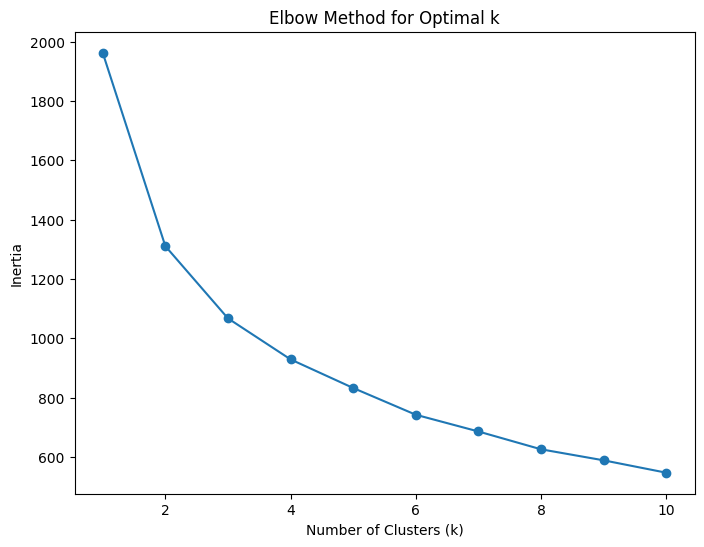

In [104]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


From the above curve we could see that we can either go with K = 2 or K = 3. But based on the dataset understanding and business knowledge we can classify the countries in 3 types. developed, developing and under developed countries. So hence we will go with K = 3 as our optimum K value.

In [117]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
X['cluster'] = y_pred

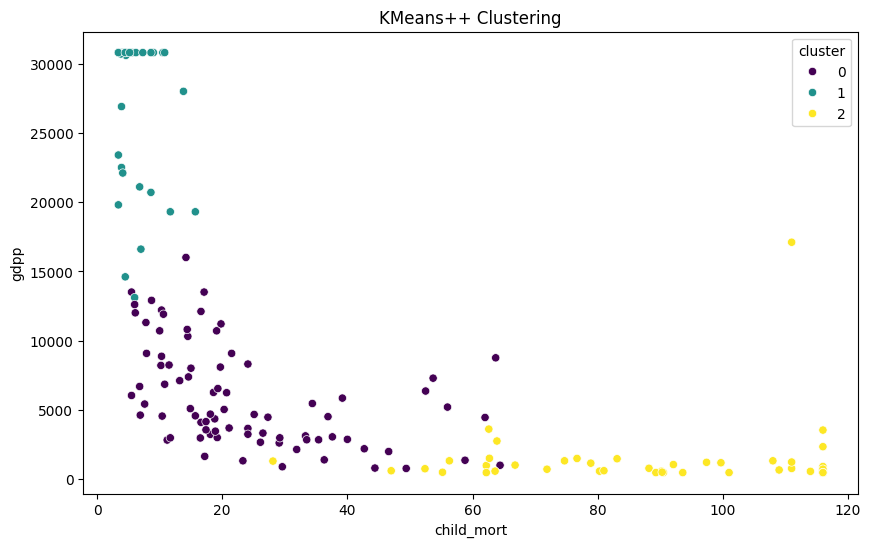

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster', data=X, palette='viridis')
plt.title('KMeans++ Clustering')
plt.show()

From the above clustering we could clearly see that cluster 1 are developed countries having high GDP and low child mortality and cluster 0 are developing countries which has good GDP and low to medium child mortality. And the cluster 2 indicates under developed countries that needs financial aid.

Now lets visualize using scatter plot with dimensionality reduction using PCA

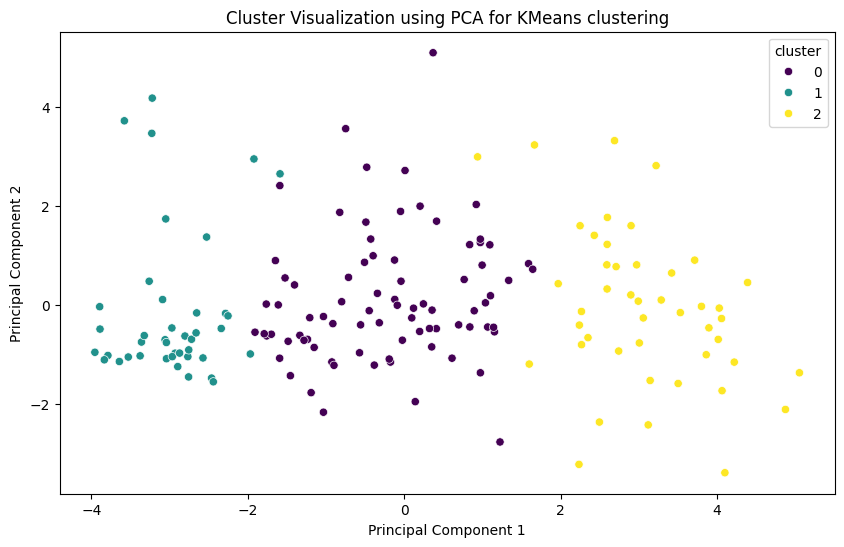

In [119]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X['cluster'], palette='viridis')
plt.title('Cluster Visualization using PCA for KMeans clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Now lets calculate the silhoutte score for the clustering

In [120]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score for KMeans:", kmeans_silhouette)

Silhouette Score for KMeans: 0.24592983145935715


**Hierarchical Clustering - Agglomerative**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [159]:
agglomerative = AgglomerativeClustering(n_clusters=3)

y_pred = agglomerative.fit_predict(X_scaled)
X['cluster'] = y_pred

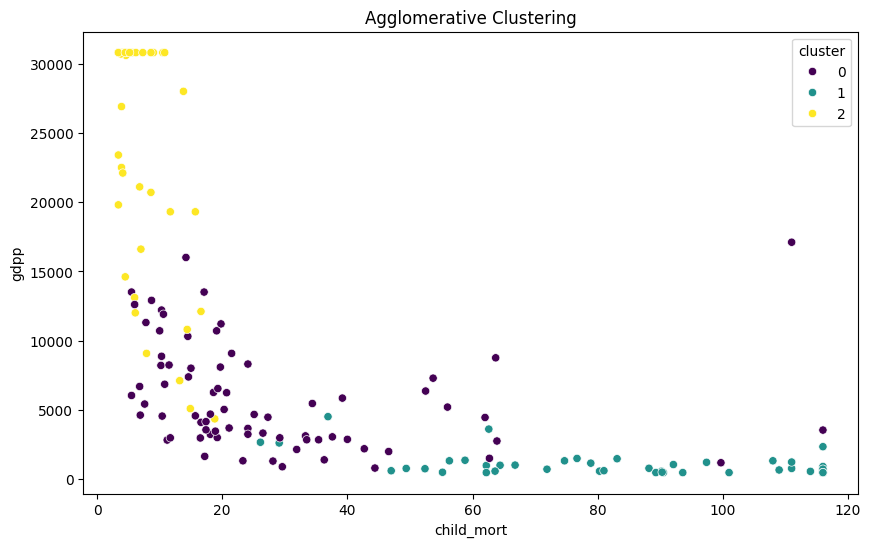

In [160]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster', data=X, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

Now lets visualize using scatter plot with dimensionality reduction using PCA

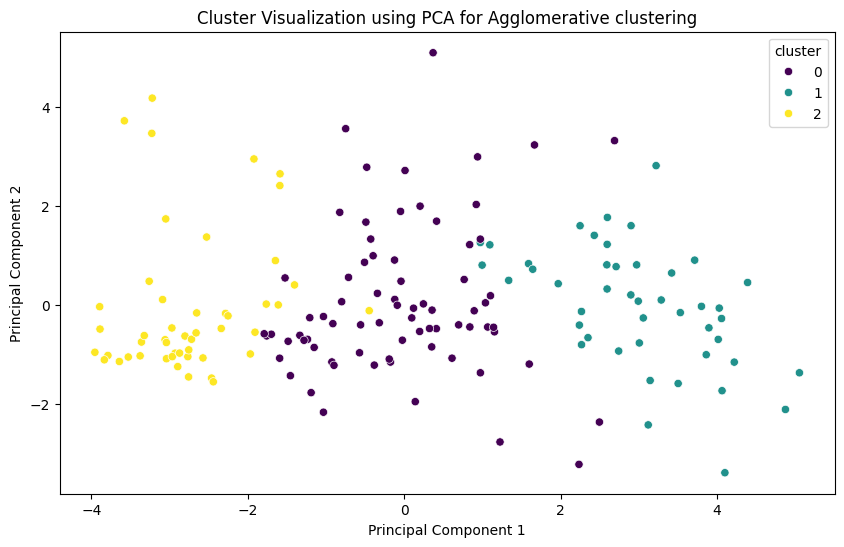

In [124]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X['cluster'], palette='viridis')
plt.title('Cluster Visualization using PCA for Agglomerative clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


lets calculate the silhoutte score for agglomerative clustering with k = 3

In [126]:
agglomerative_silhouette = silhouette_score(X_scaled, agglomerative.labels_)
print("Silhouette Score for Agglomerative Clustering:", agglomerative_silhouette)

Silhouette Score for Agglomerative Clustering: 0.2100357667081315


Lets use a dendogram to find out whats the optimum K value to use with agglomerative clustering

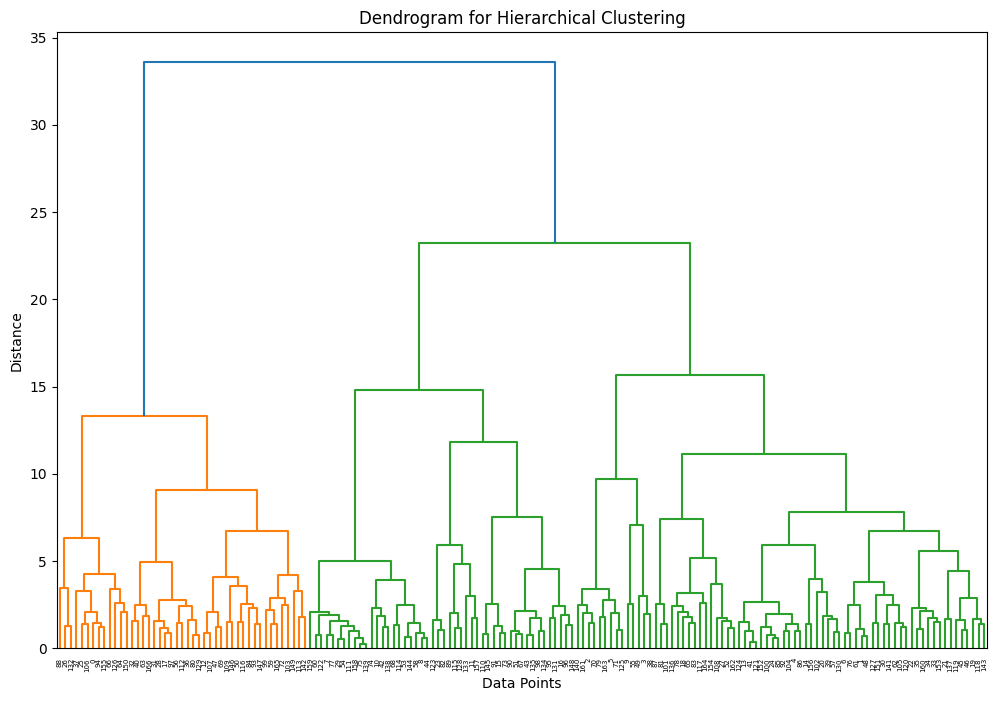

In [127]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


From the above dendogram we can see that using agglomerative clustering works best with when there are two clusters. So lets try with K = 2

In [135]:
agglomerative = AgglomerativeClustering(n_clusters=2)

y_pred = agglomerative.fit_predict(X_scaled)
X['cluster'] = y_pred

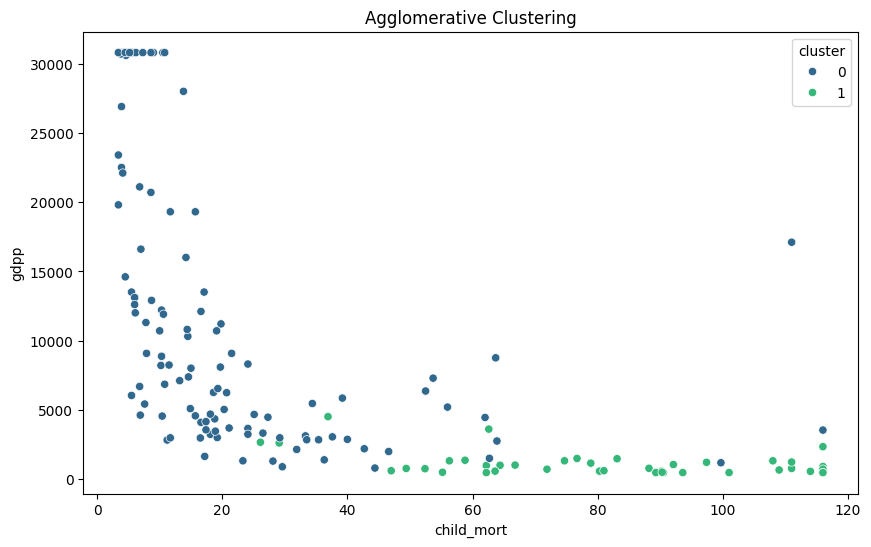

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster', data=X, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

Based on the above scatter plot we can see that it is clustering better but the boundary is not clear as we can see that cluster 0 and 1 data points are kind of intruding into both the spaces.

Now lets visualize the clusters using PCA

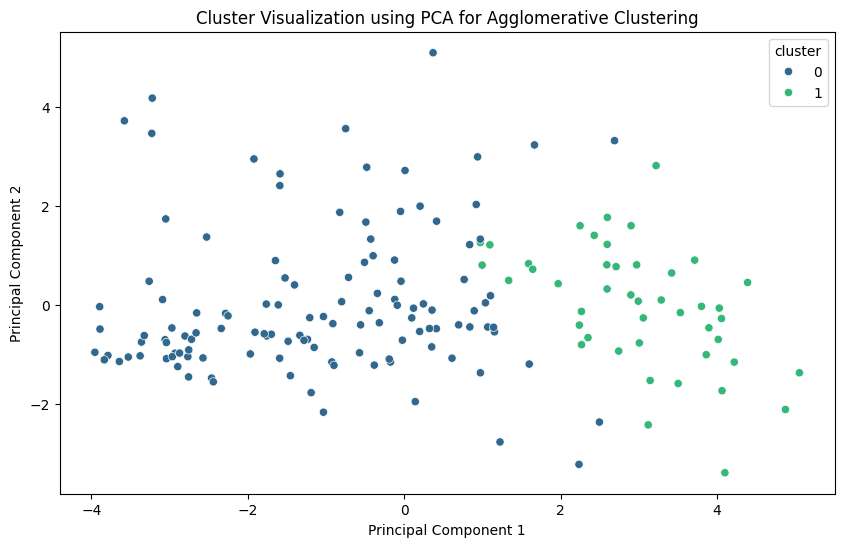

In [137]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X['cluster'], palette='viridis')
plt.title('Cluster Visualization using PCA for Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Lets calculate the Silhoutte score for agglomerative clustering with 2 clusters.

In [138]:
agglomerative_silhouette = silhouette_score(X_scaled, agglomerative.labels_)
print("Silhouette Score for Agglomerative Clustering:", agglomerative_silhouette)


Silhouette Score for Agglomerative Clustering: 0.27775389234889764


**DBSCAN clustering**

In [ ]:
from sklearn.cluster import DBSCAN

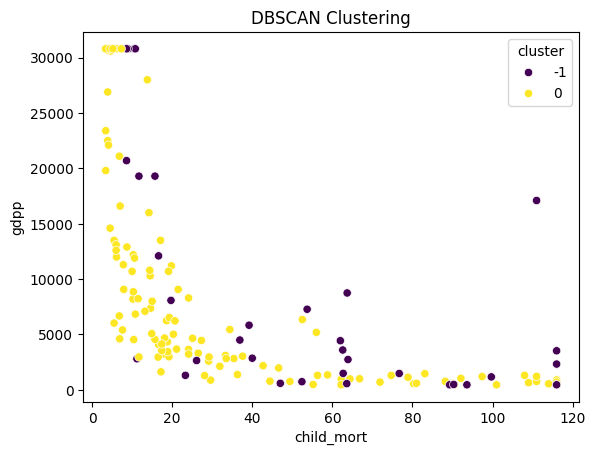

In [157]:
dbscan = DBSCAN(eps=1.9, min_samples=4)
y_pred = dbscan.fit_predict(X_scaled)
X['cluster'] = y_pred

sns.scatterplot(x='child_mort', y='gdpp', hue='cluster', data=X, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

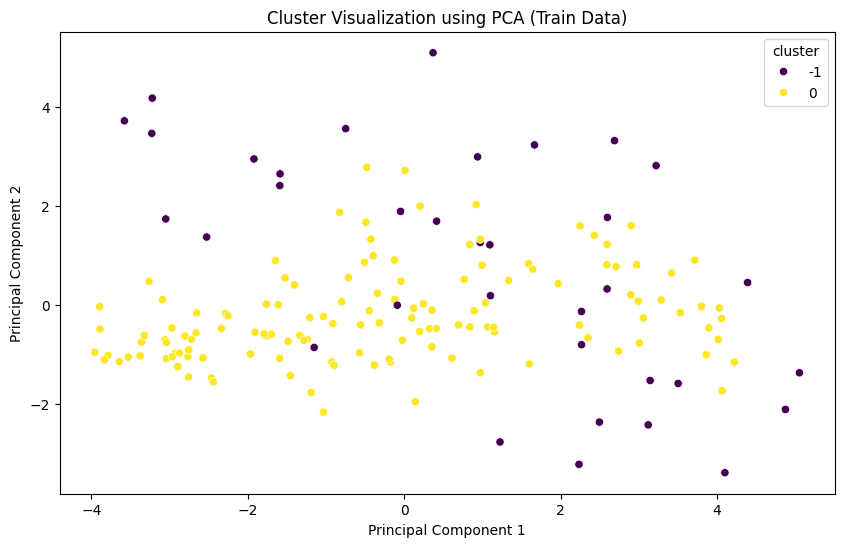

In [158]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X['cluster'], palette='viridis')
plt.title('Cluster Visualization using PCA (Train Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [154]:
DBSCAN_silhouette = silhouette_score(X_scaled, dbscan.labels_)
print("Silhouette Score for DBSCAN Clustering:", DBSCAN_silhouette)

Silhouette Score for DBSCAN Clustering: 0.15139533739322325


We could see that the clustering using DBSCAN is not giving us very good results as its difficult to tune the value of eps and min_points

So from our Cluster modelling we could see Kmeans model and Agglomerative are performing better compared to DBSCAN.

But if we see based on the score Agglomerative clustering with 2 clusters has a slighly better score of 0.27 whereas kmeans have 0.247. Although there is not much significant difference based on my business understanding I am choosing Kmeans as countries can be broadly classifed into 3 groups developed , developing and under developed countries. Developed countries and developing countries mostly dont need any financial aid. Whereas under developed countries are the ones that require financial aid.

So lets create a pickle file for our Kmeans model

In [167]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
X['cluster'] = y_pred

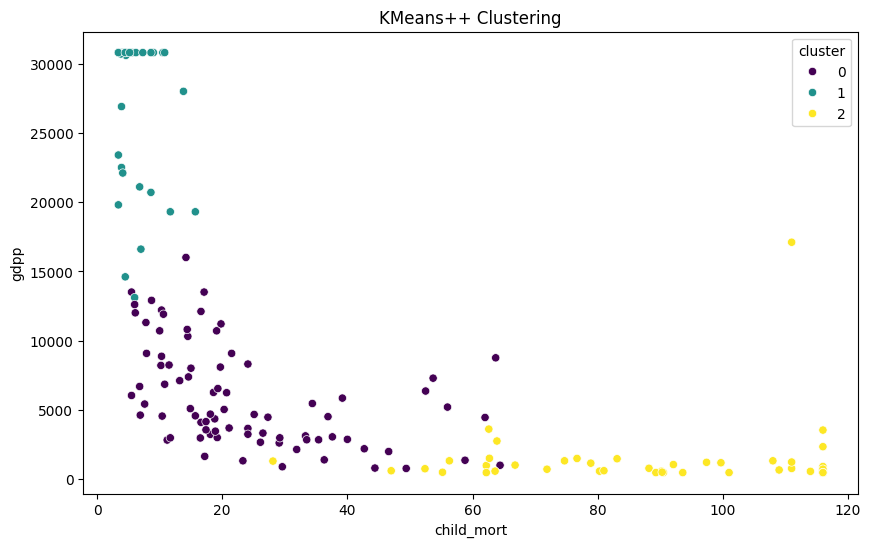

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster', data=X, palette='viridis')
plt.title('KMeans++ Clustering')
plt.show()

In [169]:
with open('Kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)